In [2]:
!pip install qiskit pylatexenc qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5f01d723d2bec593cfa3c2bafcbb133797b514d38a5068ac35fc24f63806b21c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [60]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.quantum_info import Operator
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import random

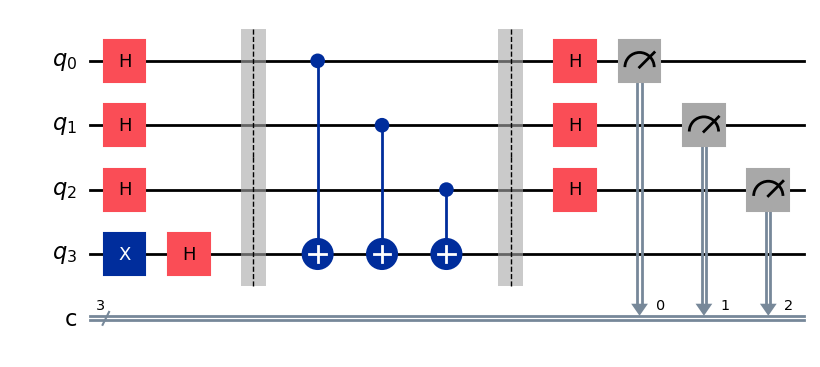

result is True for s = "111"


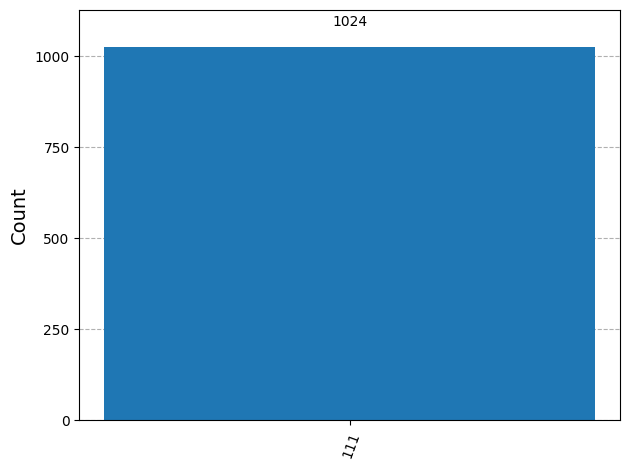

In [93]:
# s = '1110'
s_size = random.randint(2, 5)
s = bin(random.randint(1,2**s_size-1))[2:].zfill(s_size)

n = len(s)
qc = QuantumCircuit(n+1,n)

qc.x(n)
qc.h(n)

qc.h([i for i in range(n)])

qc.barrier()

s_tmp = s[::-1]
for i in range(n):
  if s_tmp[i] == '1':
    qc.cx(i, n)

qc.barrier()

qc.h([i for i in range(n)])

qc.measure([i for i in range(n)], [i for i in range(n)])

display(qc.draw(output="mpl"))

simulator = AerSimulator()

shots=1024
job = simulator.run(qc, shots=shots)

result = job.result()
counts = result.get_counts(qc)
is_true = result.data()['counts'][hex(int(s,2))] == shots
print(f'result is {is_true} for s = "{s}"')
display(plot_histogram(counts))